In [1]:
import tensorflow as tf
import os
from keras.preprocessing import image

2024-10-27 02:04:52.478982: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-10-27 02:04:52.487612: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1730009092.498172  136571 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1730009092.501199  136571 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-10-27 02:04:52.512235: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

In [2]:
print(tf.config.list_physical_devices('GPU'))
print(tf.__version__)

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
2.18.0


In [3]:
def load_images_from_path(path, label, k):
    images = []
    labels = []

    l = len(os.listdir(path))
    for i in range(l//5 * k, l//5 * (k + 1)):
        file = os.listdir(path)[i]
        images.append(image.img_to_array(image.load_img(os.path.join(path, file), target_size=(372, 147, 3))))
        labels.append((label))
        
    return images, labels

In [4]:
def getData(i):
    x = []
    y = []
    for folder in os.listdir("data/nsynth-train.jsonwav/nsynth-train/train/"):
        images, labels = load_images_from_path("data/nsynth-train.jsonwav/nsynth-train/train/" + folder, folder, i)
        x += images
        y += labels
    print(len(x), len(y))
    return x, y

In [5]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt


model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(372, 147, 3)))
model.add(MaxPooling2D(2, 2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Dropout(0.2))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D(2, 2))
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(109, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

I0000 00:00:1730009094.059794  136571 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 6302 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4060 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 370, 145, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 185, 72, 32)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 183, 70, 128)   │        36,992 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 91, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 91, 35, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 89, 33, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 44, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 44, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 42, 14, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 21, 7, 128)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 18816)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1024)           │    19,268,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 109)            │       111,725 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 19,713,389 (75.20 MB)

 Trainable params: 19,713,389 (75.20 MB)

 Non-trainable params: 0 (0.00 B)

6363 6363
Epoch 1/20


I0000 00:00:1730009119.007450  136719 service.cc:148] XLA service 0x734ef800d120 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730009119.007486  136719 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 4060 Laptop GPU, Compute Capability 8.9
2024-10-27 02:05:19.037743: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1730009119.128249  136719 cuda_dnn.cc:529] Loaded cuDNN version 90300
2024-10-27 02:05:19.213324: W external/local_xla/xla/service/gpu/nvptx_compiler.cc:930] The NVIDIA driver's CUDA version is 12.2 which is older than the PTX compiler version 12.5.82. Because the driver is older than the PTX compiler version, XLA is disabling parallel compilation, which may slow down compilation. You should update your NVIDIA driver or use the NVIDIA-provided CUDA forward compatibility packages.
2024-10

  1/140 ━━━━━━━━━━━━━━━━━━━━ 20:42 9s/step - accuracy: 0.0000e+00 - loss: 4.7395

I0000 00:00:1730009127.164473  136719 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


139/140 ━━━━━━━━━━━━━━━━━━━━ 0s 59ms/step - accuracy: 0.0810 - loss: 4.1789

2024-10-27 02:05:36.002762: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1223', 164 bytes spill stores, 148 bytes spill loads

2024-10-27 02:05:36.054000: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1223', 4 bytes spill stores, 4 bytes spill loads

2024-10-27 02:05:36.065374: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1223', 44 bytes spill stores, 44 bytes spill loads

2024-10-27 02:05:36.140121: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_1339', 104 bytes spill stores, 104 bytes spill loads

2024-10-27 02:05:36.148890: I external/local_xla/xla/strea

140/140 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step - accuracy: 0.0821 - loss: 4.1734

2024-10-27 02:05:40.580333: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.54GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-27 02:05:40.920463: W external/local_xla/xla/tsl/framework/bfc_allocator.cc:306] Allocator (GPU_0_bfc) ran out of memory trying to allocate 2.55GiB with freed_by_count=0. The caller indicates that this is not a failure, but this may mean that there could be performance gains if more memory were available.
2024-10-27 02:05:42.737412: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_110', 556 bytes spill stores, 364 bytes spill loads

2024-10-27 02:05:42.750969: I external/local_xla/xla/stream_executor/cuda/cuda_asm_compiler.cc:397] ptxas warning : Registers are spil

140/140 ━━━━━━━━━━━━━━━━━━━━ 26s 122ms/step - accuracy: 0.0833 - loss: 4.1679 - val_accuracy: 0.6501 - val_loss: 1.6578
Epoch 2/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.7067 - loss: 1.3355 - val_accuracy: 0.7548 - val_loss: 1.1518
Epoch 3/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.8235 - loss: 0.7464 - val_accuracy: 0.7957 - val_loss: 1.0747
Epoch 4/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9010 - loss: 0.4573 - val_accuracy: 0.8188 - val_loss: 1.0287
Epoch 5/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9371 - loss: 0.2570 - val_accuracy: 0.8376 - val_loss: 0.9453
Epoch 6/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9669 - loss: 0.1383 - val_accuracy: 0.8324 - val_loss: 1.2684
Epoch 7/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9726 - loss: 0.1652 - val_accuracy: 0.8481 - val_loss: 1.1171
Epoch 8/20
140/140 ━━━━━━━━━━━━━━━━━━━━ 9s 66ms/step - accuracy: 0.9910 - loss: 0.0681 - val_accuracy: 0.8

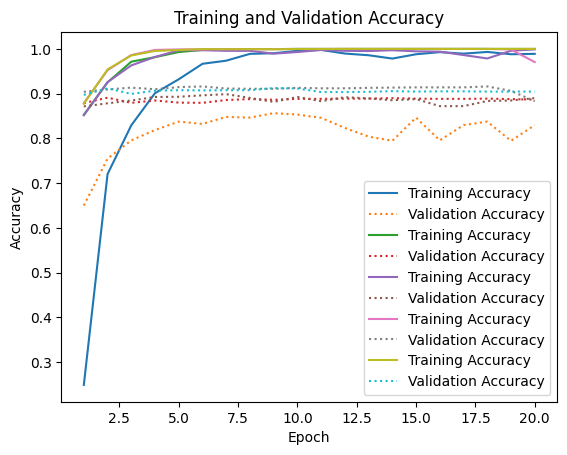

In [6]:
for i in range(5):
    x, y = getData(i)
    x_train, x_test, y_train, y_test = train_test_split(x, y, stratify=y, test_size=0.3, random_state=0)

    x_train_norm = np.array(x_train) / 255
    x_test_norm = np.array(x_test) / 255

    y_train_encoded = to_categorical(y_train)
    y_test_encoded = to_categorical(y_test)

    hist = model.fit(x_train_norm, y_train_encoded, validation_data=(x_test_norm, y_test_encoded), batch_size=32, epochs=20)
    acc = hist.history['accuracy']
    val_acc = hist.history['val_accuracy']
    epochs = range(1, len(acc) + 1)

    plt.plot(epochs, acc, '-', label='Training Accuracy')
    plt.plot(epochs, val_acc, ':', label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(loc='lower right')
    plt.savefig(f"{i}.png")

In [8]:
model.save("trainedModelV1.keras")